# Project Name - Dog Breed Prediction

### Problem Statement - Recognise the breed of a dog by using convolutional neural network

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

In [2]:
labels_all = pd.read_csv('labels.csv')
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
labels_all['breed'].value_counts().head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [4]:
class_names = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(class_names))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


### Convert images into numpy arrays

In [5]:
# converting numpy matrix with zeros
X_data = np.zeros((len(labels),224,224,3),dtype='float32')

print(X_data.shape)

(357, 224, 224, 3)


In [6]:
# one hot encoding
Y_data = label_binarize(labels['breed'],classes=class_names)

Y_data

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [7]:
# Reading and conerting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('train/%s.jpg' % labels['id'][i],target_size=(224,224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(),axis=0)
    X_data[i] = x / 225.0
    
print('Train images shape: ',X_data.shape,'shape: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,'size: {:,}'.format(Y_data.size))

100%|███████████████████████████████████████████████████████████████████████████████| 357/357 [00:02<00:00, 121.30it/s]

Train images shape:  (357, 224, 224, 3) shape: 53,738,496
One-hot encoded output shape:  (357, 3) size: 1,071


### Building the model

In [8]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size= (5,5), activation = 'relu', input_shape= (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size= (3,3), activation = 'relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size= (7,7), activation = 'relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8, kernel_size= (5,5), activation = 'relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
model.add(Dense(64, activation = 'relu', kernel_regularizer='l2'))
model.add(Dense(len(class_names), activation= 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0001),metrics=['accuracy'])

In [9]:
# splitting data into training data and test data
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X_data, Y_data, test_size=0.1)

# splitting data into training data and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val,y_train_and_val, test_size = 0.2)

After defining the network architecture we will start with splitting the test and train data then dividing train data in train and validation data. 

In [10]:
epochs = 25
batch_size = 128

history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs,
                   validation_data=(X_val,y_val))

Epoch 1/25
2/2 [==============================] - 182s 80s/step - loss: 4.8942 - accuracy: 0.3359 - val_loss: 4.8787 - val_accuracy: 0.2769
Epoch 2/25
2/2 [==============================] - 172s 84s/step - loss: 4.8649 - accuracy: 0.3398 - val_loss: 4.8510 - val_accuracy: 0.3077
Epoch 3/25
2/2 [==============================] - 174s 88s/step - loss: 4.8372 - accuracy: 0.4492 - val_loss: 4.8270 - val_accuracy: 0.4308
Epoch 4/25
2/2 [==============================] - 170s 93s/step - loss: 4.8114 - accuracy: 0.4883 - val_loss: 4.8021 - val_accuracy: 0.4000
Epoch 5/25
2/2 [==============================] - 181s 99s/step - loss: 4.7850 - accuracy: 0.4727 - val_loss: 4.7772 - val_accuracy: 0.4923
Epoch 6/25
2/2 [==============================] - 171s 88s/step - loss: 4.7581 - accuracy: 0.5234 - val_loss: 4.7522 - val_accuracy: 0.4923
Epoch 7/25
2/2 [==============================] - 179s 86s/step - loss: 4.7301 - accuracy: 0.5508 - val_loss: 4.7262 - val_accuracy: 0.5077
Epoch 8/25
2/2 [====

Now we will train our model on 100 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

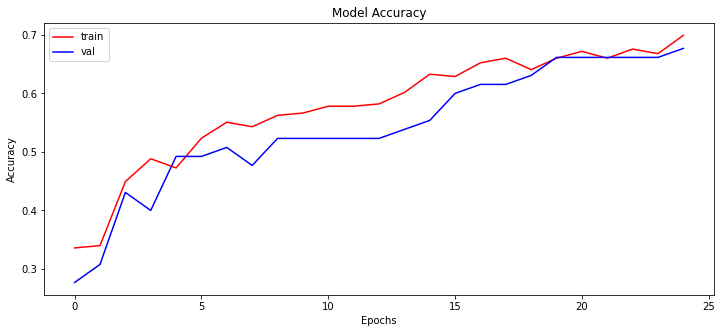

In [11]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Here we analyse how the model is learning with each epoch in terms of accuracy.

In [13]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 2s 181ms/step - loss: 3.9737 - accuracy: 0.7778
Accuracy over the test set: 
  77.78 %


We will use predict function to make predictions using this model also we are finding out the accuracy on the test set.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


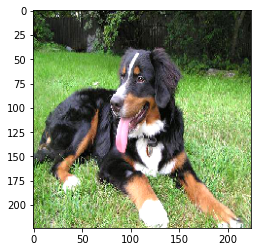

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [15]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])

Here you can see image with its original and predicted label.

## Conclusion:

We started with downloading the dataset creating the model and finding out the predictions using the model. We can optimize different hyper parameters in order to tune this model for a higher accuracy. This model can be used to predict different breeds of dogs which can be further used by different NGO's working on saving animals and for educational purposes also.